<a href="https://colab.research.google.com/github/Shinbly/Project-Food/blob/master/database/bd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import os
os.chdir('/content/gdrive/My Drive/Projet Perso M2')
!pwd

/content/gdrive/My Drive/Projet Perso M2


In [ ]:
import io, os, sys, types, time, datetime, math, random, requests, subprocess, tempfile

In [ ]:
# Data Manipulation 
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning 
from sklearn import tree

# Metrics
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

# Plot the Figures Inline
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
raw_data = pd.read_csv("foods.csv", skiprows= [0])
df = pd.read_csv("foods.csv", skiprows= [0])
df

,Food,FoodId,does it contain cheese,does it contain dought (ie : bread) ?,does it contain vegetables ?,healthy ?,there is a soup ?,cooked in hoven ?,hot ?,Vegetarian?,sea food or fish ?,is it sauce based food,is the preparation fast ?,Is it asian food ?,Is it Italian food ?,Is it Mexican food
0,Pizza,0,yes,yes,yes,no,no,yes,yes,no,yes and no,no,yes,no,yes,no
1,Burger,1,yes and no,yes,yes,no,no,no,yes,no,no,no,yes,no,no,no
2,Pasta,2,yes and no,no,yes,yes and no,no,no,yes,yes and no,yes and no,no,yes,no,yes,no
3,Hot dog,3,yes and no,yes,no,no,no,no,yes,no,no,no,yes,no,no,no
4,Salad,4,yes and no,no,yes,yes,no,no,no,yes and no,no,no,yes,no,no,no
5,Ramen,5,no,no,yes,yes and no,yes,no,yes,no,no,no,no,yes,no,no
6,Gratin dauphinois,6,no,no,no,no,no,yes,yes,yes,no,no,no,no,no,no
7,Carrotes vichy,7,no,no,yes,no,no,no,yes,yes,no,no,yes,no,no,no
8,Minestrone,8,yes,no,yes,yes,yes,no,yes,yes and no,no,no,no,no,yes,no
9,Pho,9,no,no,yes,yes,yes,no,yes,no,no,no,no,yes,no,no


In [ ]:
df.describe(exclude=[np.number])  

,Food,does it contain cheese,does it contain dought (ie : bread) ?,does it contain vegetables ?,healthy ?,there is a soup ?,cooked in hoven ?,hot ?,Vegetarian?,sea food or fish ?,is it sauce based food,is the preparation fast ?,Is it asian food ?,Is it Italian food ?,Is it Mexican food
count,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
unique,27,3,2,3,3,2,2,3,3,3,2,2,2,2,2
top,Burger,no,no,yes,no,no,no,yes,no,no,no,yes,no,no,no
freq,1,16,23,22,19,23,23,24,16,23,24,14,20,22,23


In [ ]:
# Let’s plot the distribution of each feature
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)

In [ ]:
print("start : df of size {}".format(df.size))
for index, column in enumerate(df.columns) :
  yes = pd.DataFrame()
  for i, columns in enumerate(df.columns):
    yes[columns] = df[columns]
  yes.loc[yes[column] == 'yes and no', column] = "yes"
  df.loc[df[column] == 'yes and no', column] = "no"
  df = df.append(yes)
  df = df.drop_duplicates(df.columns, ignore_index=True)
  print("{} : df of size {}".format(index, df.size))


print("end : df of size {}".format(df.size))

df.describe(exclude=[np.number])

start : df of size 432
0 : df of size 432
1 : df of size 432
2 : df of size 544
3 : df of size 544
4 : df of size 560
5 : df of size 608
6 : df of size 608
7 : df of size 608
8 : df of size 656
9 : df of size 880
10 : df of size 1040
11 : df of size 1040
12 : df of size 1040
13 : df of size 1040
14 : df of size 1040
15 : df of size 1040
end : df of size 1040


,Food,FoodId,does it contain cheese,does it contain dought (ie : bread) ?,does it contain vegetables ?,healthy ?,there is a soup ?,cooked in hoven ?,hot ?,Vegetarian?,sea food or fish ?,is it sauce based food,is the preparation fast ?,Is it asian food ?,Is it Italian food ?,Is it Mexican food
count,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65
unique,27,27,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Pasta,2,no,no,yes,no,no,no,yes,no,no,no,yes,no,no,no
freq,16,16,41,58,59,45,59,60,56,43,54,61,46,53,42,52


Find the duplicate will help to know if more questions are needed or no 

In [ ]:
duplicates = df[df.duplicated(df.columns[2:],keep=False)]

duplicates.describe(exclude=[np.number])
drop = []
for column in duplicates.columns[2:]:
  if len(duplicates[column].unique().tolist()) == 1:
    drop.append(column)
duplicates = duplicates.drop(columns= drop)
value = duplicates[duplicates.columns[2]].copy()
for column in duplicates.columns[3:]:
  value += duplicates[column]
duplicates['value'] = value
duplicates = duplicates.sort_values("Food")
duplicatesGroup = duplicates.groupby("value")
if len(duplicatesGroup.groups) > 0 : 
  print('you need a new question for differenciate :')
  for group in duplicatesGroup.groups : 
    same = duplicatesGroup.get_group(group)
    names = same['Food'].tolist()
    print('\t- {}'.format(names))
else : 
   print('Great ! you have enouth questions to differentiate all the food')

you need a new question for differenciate :
	- ['Burritos', 'Fajitas']
	- ['Nems', 'Tonkatsu']
	- ['Burritos', 'Enchiladas', 'Fajitas']
	- ['Pho', 'Ramen']
	- ['Enchiladas', 'Fajitas']


In [ ]:
# To perform our data analysis, let's create new dataframes.
dataset_bin = pd.DataFrame() # To contain our dataframe with our discretised continuous variables 
dataset_con = pd.DataFrame() # To contain our dataframe with our continuous variables 

In [ ]:
dataset_bin['Food'] = df['Food']
dataset_con['Food'] = df['Food']


dataset_bin['FoodId'] = df['FoodId']
dataset_con['FoodId'] = dataset_bin['FoodId']

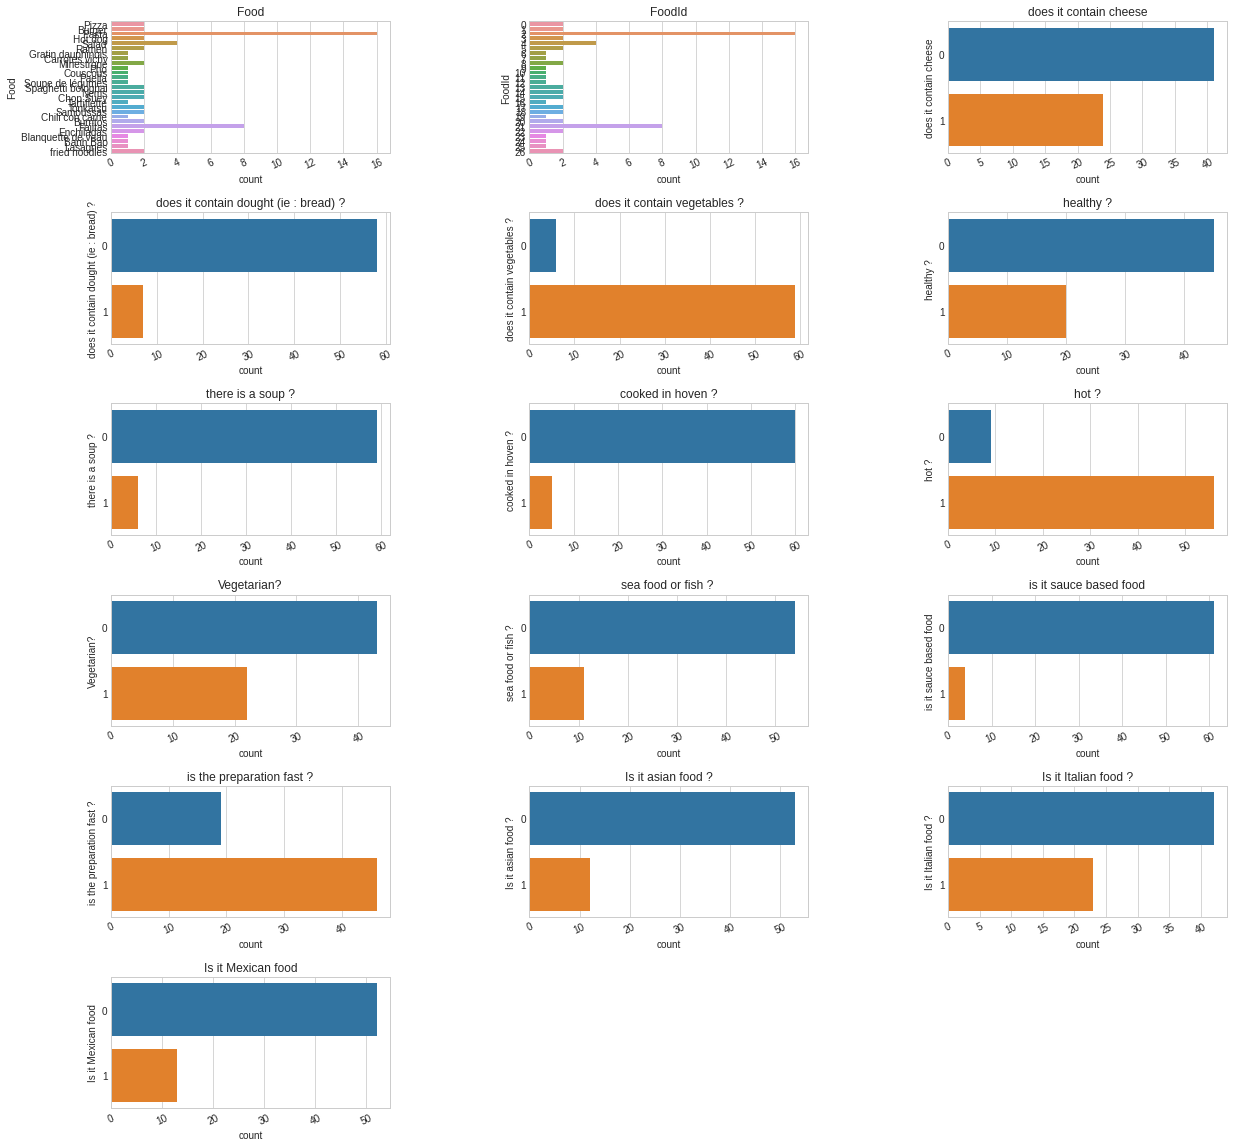

In [ ]:
for i, column in enumerate(df.columns):
  if(i != 0):
    dataset_bin[column] = df[column]
    dataset_bin.loc[dataset_bin[column] == 'no', column] = 0
    dataset_bin.loc[dataset_bin[column] == 'yes', column] = 1
    dataset_con[column] = dataset_bin[column]
plot_distribution(dataset_con, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

In [ ]:
input = dataset_con.drop(['Food','FoodId'], axis=1)
input.head()

,does it contain cheese,does it contain dought (ie : bread) ?,does it contain vegetables ?,healthy ?,there is a soup ?,cooked in hoven ?,hot ?,Vegetarian?,sea food or fish ?,is it sauce based food,is the preparation fast ?,Is it asian food ?,Is it Italian food ?,Is it Mexican food
0,1,1,1,0,0,1,1,0,0,0,1,0,1,0
1,0,1,1,0,0,0,1,0,0,0,1,0,0,0
2,0,0,1,0,0,0,1,0,0,0,1,0,1,0
3,0,1,0,0,0,0,1,0,0,0,1,0,0,0
4,0,0,1,1,0,0,0,0,0,0,1,0,0,0


In [ ]:
targetId = dataset_con['FoodId']
targetLabel = raw_data['Food']

targetId = pd.to_numeric(targetId, downcast='integer')

targetLabel

0                    Pizza
1                   Burger
2                    Pasta
3                  Hot dog
4                    Salad
5                    Ramen
6        Gratin dauphinois
7           Carrotes vichy
8               Minestrone
9                      Pho
10                Couscous
11                  Paella
12        Soupe de légumes
13    Spaghetti bolognaise
14                    Nems
15               Chop Suey
16             Tartiflette
17                Tonkatsu
18               Samoussas
19         Chili con carne
20                Burritos
21                 Fajitas
22              Enchiladas
23      Blanquette de veau
24                Banh Bao
25                Lasagnes
26           fried noodles
Name: Food, dtype: object

In [ ]:
model = tree.DecisionTreeClassifier()

In [ ]:
model.fit(input, targetId)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
model.score(input,targetId)

0.9076923076923077

In [ ]:
#let's try to predict ramen : 
def predict(prediction):
  res = model.predict([prediction])
  id = res[0]
  print(res)
  print('you whant to eat {}'.format(targetLabel[id]))
predict([0,0,1,0,1,0,1,0,0,0,0,1,0,0])  


[5]
you whant to eat Ramen


[Text(4154.484375, 1556.6727272727271, 'Is it Italian food ? <= 0.5\n0.906\n100.0%\n[0.031, 0.031, 0.246, 0.031, 0.062, 0.031, 0.015, 0.015\n0.031, 0.015, 0.015, 0.015, 0.015, 0.031, 0.031, 0.031\n0.015, 0.031, 0.031, 0.015, 0.031, 0.123, 0.031, 0.015\n0.015, 0.015, 0.031]\nPasta'),
 Text(3286.96875, 1408.418181818182, 'Is it Mexican food <= 0.5\n0.926\n64.6%\n[0.0, 0.048, 0.0, 0.048, 0.095, 0.048, 0.024, 0.024\n0.0, 0.024, 0.024, 0.024, 0.024, 0.0, 0.048, 0.048\n0.024, 0.048, 0.048, 0.024, 0.048, 0.19, 0.048, 0.024\n0.024, 0.0, 0.048]\nFajitas'),
 Text(2388.9375, 1260.1636363636362, 'hot ? <= 0.5\n0.932\n44.6%\n[0.0, 0.069, 0.0, 0.069, 0.138, 0.069, 0.034, 0.034\n0.0, 0.034, 0.034, 0.034, 0.034, 0.0, 0.069, 0.069\n0.034, 0.069, 0.069, 0.0, 0.0, 0.0, 0.0, 0.034, 0.034\n0.0, 0.069]\nSalad'),
 Text(2249.4375, 1111.909090909091, '0.0\n6.2%\n[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0\n0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0\n0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]\nSalad'),
 Tex

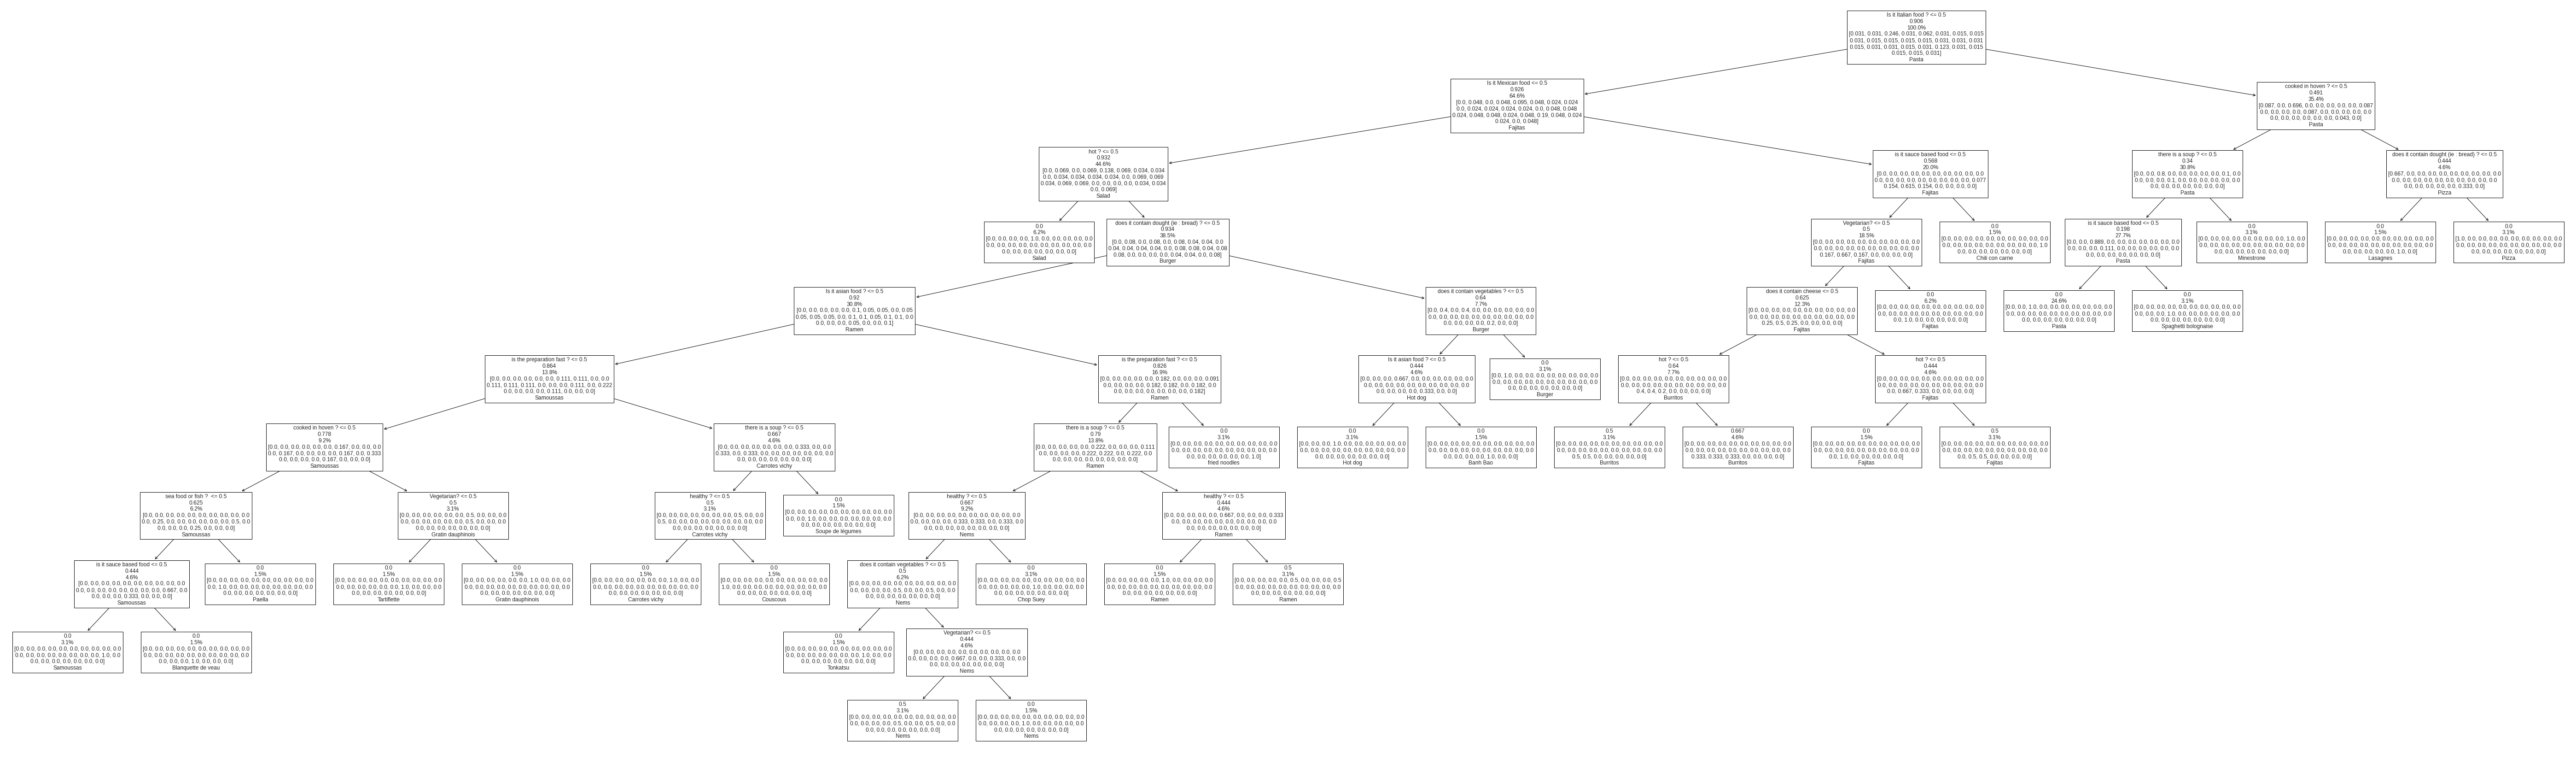

In [ ]:

plt.subplots(figsize=(100, 30))
tree.plot_tree(
    model, 
    fontsize= 12, 
    feature_names= input.columns,
    class_names = targetLabel,
    label = 'none',
    proportion = True,
    )

In [ ]:
!pip3 install sklite

In [ ]:
from sklite import LazyExport

lazy = LazyExport(model)
lazy.save("decisionTree.json",indent='  ',force_override=True)


In [ ]:
infos_features = pd.DataFrame()
infos_features['feature_names'] = input.columns
infos_features['features_importance'] = model.feature_importances_
infos_features.to_json('features.json',orient='index')

infos_features.sort_values('features_importance',ascending=False)


,feature_names,features_importance
12,Is it Italian food ?,0.163681
9,is it sauce based food,0.118678
4,there is a soup ?,0.113924
13,Is it Mexican food,0.084857
5,cooked in hoven ?,0.082057
6,hot ?,0.079601
3,healthy ?,0.063058
1,does it contain dought (ie : bread) ?,0.058518
10,is the preparation fast ?,0.058472
11,Is it asian food ?,0.054192


In [ ]:
info_classes = pd.DataFrame()
info_classes["label"] = targetLabel

info_classes.to_json('classes.json',orient='index')

info_classes.head()

,label
0,Pizza
1,Burger
2,Pasta
3,Hot dog
4,Salad


In [ ]:
print("depth = {}".format(model.get_depth()))
print("leaves = {}".format(model.get_n_leaves()))
print("params = {}".format(model.get_params()))



depth = 10
leaves = 30
params = {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}
